# 2.3 EDA

### Checking to see how natural disasters affect the population of a country

### We decided to use the Natural disaster dataset as environmental factors such as droughts and floods can cause many casualties and force populations to relocate from affected areas to more habitable regions. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('1900_2021disasters.csv') #natural dsaster dataset
df.head()

,Year,Seq,Glide,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,Event Name,Country,...,No Affected,No Homeless,Total Affected,Insured Damages ('000 US$),Total Damages ('000 US$),CPI,Adm Level,Admin1 Code,Admin2 Code,Geo Locations
0,1900,9002,NaN,Natural,Climatological,Drought,Drought,NaN,NaN,Cabo Verde,...,NaN,NaN,NaN,NaN,NaN,3.221647,NaN,NaN,NaN,NaN
1,1900,9001,NaN,Natural,Climatological,Drought,Drought,NaN,NaN,India,...,NaN,NaN,NaN,NaN,NaN,3.221647,NaN,NaN,NaN,NaN
2,1902,12,NaN,Natural,Geophysical,Earthquake,Ground movement,NaN,NaN,Guatemala,...,NaN,NaN,NaN,NaN,25000.0,3.350513,NaN,NaN,NaN,NaN
3,1902,3,NaN,Natural,Geophysical,Volcanic activity,Ash fall,NaN,Santa Maria,Guatemala,...,NaN,NaN,NaN,NaN,NaN,3.350513,NaN,NaN,NaN,NaN
4,1902,10,NaN,Natural,Geophysical,Volcanic activity,Ash fall,NaN,Santa Maria,Guatemala,...,NaN,NaN,NaN,NaN,NaN,3.350513,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16126 entries, 0 to 16125
Data columns (total 45 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Year                        16126 non-null  int64  
 1   Seq                         16126 non-null  int64  
 2   Glide                       1581 non-null   object 
 3   Disaster Group              16126 non-null  object 
 4   Disaster Subgroup           16126 non-null  object 
 5   Disaster Type               16126 non-null  object 
 6   Disaster Subtype            13016 non-null  object 
 7   Disaster Subsubtype         1077 non-null   object 
 8   Event Name                  3861 non-null   object 
 9   Country                     16126 non-null  object 
 10  ISO                         16126 non-null  object 
 11  Region                      16126 non-null  object 
 12  Continent                   16126 non-null  object 
 13  Location                    143

#### checking for missing values

In [4]:
df.isnull().sum()

Year                              0
Seq                               0
Glide                         14545
Disaster Group                    0
Disaster Subgroup                 0
Disaster Type                     0
Disaster Subtype               3110
Disaster Subsubtype           15049
Event Name                    12265
Country                           0
ISO                               0
Region                            0
Continent                         0
Location                       1792
Origin                        12332
Associated Dis                12778
Associated Dis2               15419
OFDA Response                 14432
Appeal                        13557
Declaration                   12870
Aid Contribution              15449
Dis Mag Value                 11180
Dis Mag Scale                  1190
Latitude                      13397
Longitude                     13394
Local Time                    15023
River Basin                   14839
Start Year                  

In [5]:
df2 = pd.read_csv('demographic.csv') #using our main population dataset
df2.head()

,Country name,Year,Population,Population of children under the age of 1,Population of children under the age of 5,Population of children under the age of 15,Population under the age of 25,Population aged 15 to 64 years,Population older than 15 years,Population older than 18 years,...,Population aged 15 to 19 years,Population aged 20 to 29 years,Population aged 30 to 39 years,Population aged 40 to 49 years,Population aged 50 to 59 years,Population aged 60 to 69 years,Population aged 70 to 79 years,Population aged 80 to 89 years,Population aged 90 to 99 years,Population older than 100 years
0,Afghanistan,1950,7480464,301735.0,1248282,3068855,4494349,4198587,4411609,3946595,...,757113,1241348,909953,661807,467170,271905,92691,9499,123,0.0
1,Afghanistan,1951,7571542,299368.0,1246857,3105444,4552138,4250002,4466098,3993640,...,768616,1260904,922765,667015,468881,273286,94358,10155,118,0.0
2,Afghanistan,1952,7667534,305393.0,1248220,3145070,4613604,4303436,4522464,4041439,...,781411,1280288,935638,672491,470898,274852,96026,10721,139,0.0
3,Afghanistan,1953,7764549,311574.0,1254725,3186382,4676232,4356242,4578167,4088379,...,794308,1298803,948321,678064,472969,276577,97705,11254,166,0.0
4,Afghanistan,1954,7864289,317584.0,1267817,3231060,4741371,4408474,4633229,4136116,...,806216,1316768,961484,684153,475117,278210,99298,11793,190,0.0


removing redundant columns from the natural disasters dataset as they are not useful in this scenario

In [6]:
remove_columns = ["Seq", "Glide", "Disaster Subsubtype", "Origin", "Associated Dis", 
                  "Associated Dis2", "OFDA Response", "Appeal", "Declaration", "Aid Contribution", "River Basin", 
                  "Adm Level", "Admin1 Code", "Admin2 Code"]

df = df.drop(columns=remove_columns)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16126 entries, 0 to 16125
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Year                        16126 non-null  int64  
 1   Disaster Group              16126 non-null  object 
 2   Disaster Subgroup           16126 non-null  object 
 3   Disaster Type               16126 non-null  object 
 4   Disaster Subtype            13016 non-null  object 
 5   Event Name                  3861 non-null   object 
 6   Country                     16126 non-null  object 
 7   ISO                         16126 non-null  object 
 8   Region                      16126 non-null  object 
 9   Continent                   16126 non-null  object 
 10  Location                    14334 non-null  object 
 11  Dis Mag Value               4946 non-null   float64
 12  Dis Mag Scale               14936 non-null  object 
 13  Latitude                    272

#### since many columns have missing values it can be understood as they were not affected overall so instead filling values with 0

In [8]:
columnstofill=['Total Deaths','No Injured', 'No Affected', 'No Homeless', 'Total Affected']
df[columnstofill] = df[columnstofill].fillna(0)


#### checking the number of disasters per year

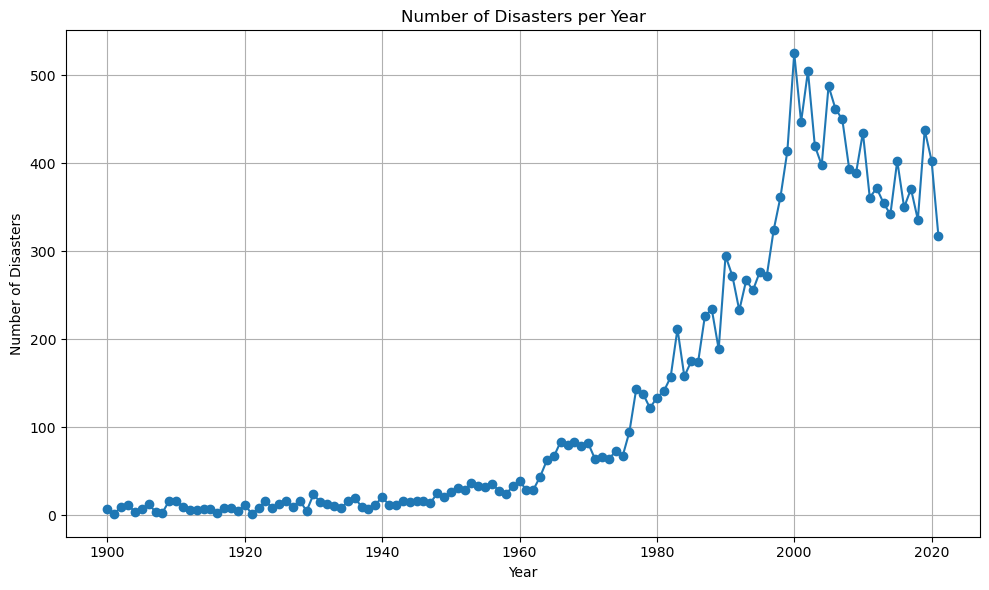

In [9]:
yearly_disasters = df.groupby("Start Year").size().reset_index(name="Number of Disasters")
plt.figure(figsize=(10, 6))
plt.plot(yearly_disasters["Start Year"], yearly_disasters["Number of Disasters"], marker='o')
plt.title("Number of Disasters per Year")
plt.xlabel("Year")
plt.ylabel("Number of Disasters")
plt.grid(True)
plt.tight_layout()
plt.show()



### Checking to see which type of natural disaster causes the most casualties

Disaster Type
Animal accident          5.000000e+00
Drought                  2.798204e+09
Earthquake               1.749526e+08
Epidemic                 4.709676e+07
Extreme temperature      1.013284e+08
Flood                    3.796115e+09
Fog                      0.000000e+00
Glacial lake outburst    0.000000e+00
Impact                   3.000000e+05
Insect infestation       2.802200e+06
Landslide                1.038593e+07
Mass movement (dry)      2.113800e+04
Storm                    1.176948e+09
Volcanic activity        9.509983e+06
Wildfire                 1.770660e+07
Name: No Affected, dtype: float64


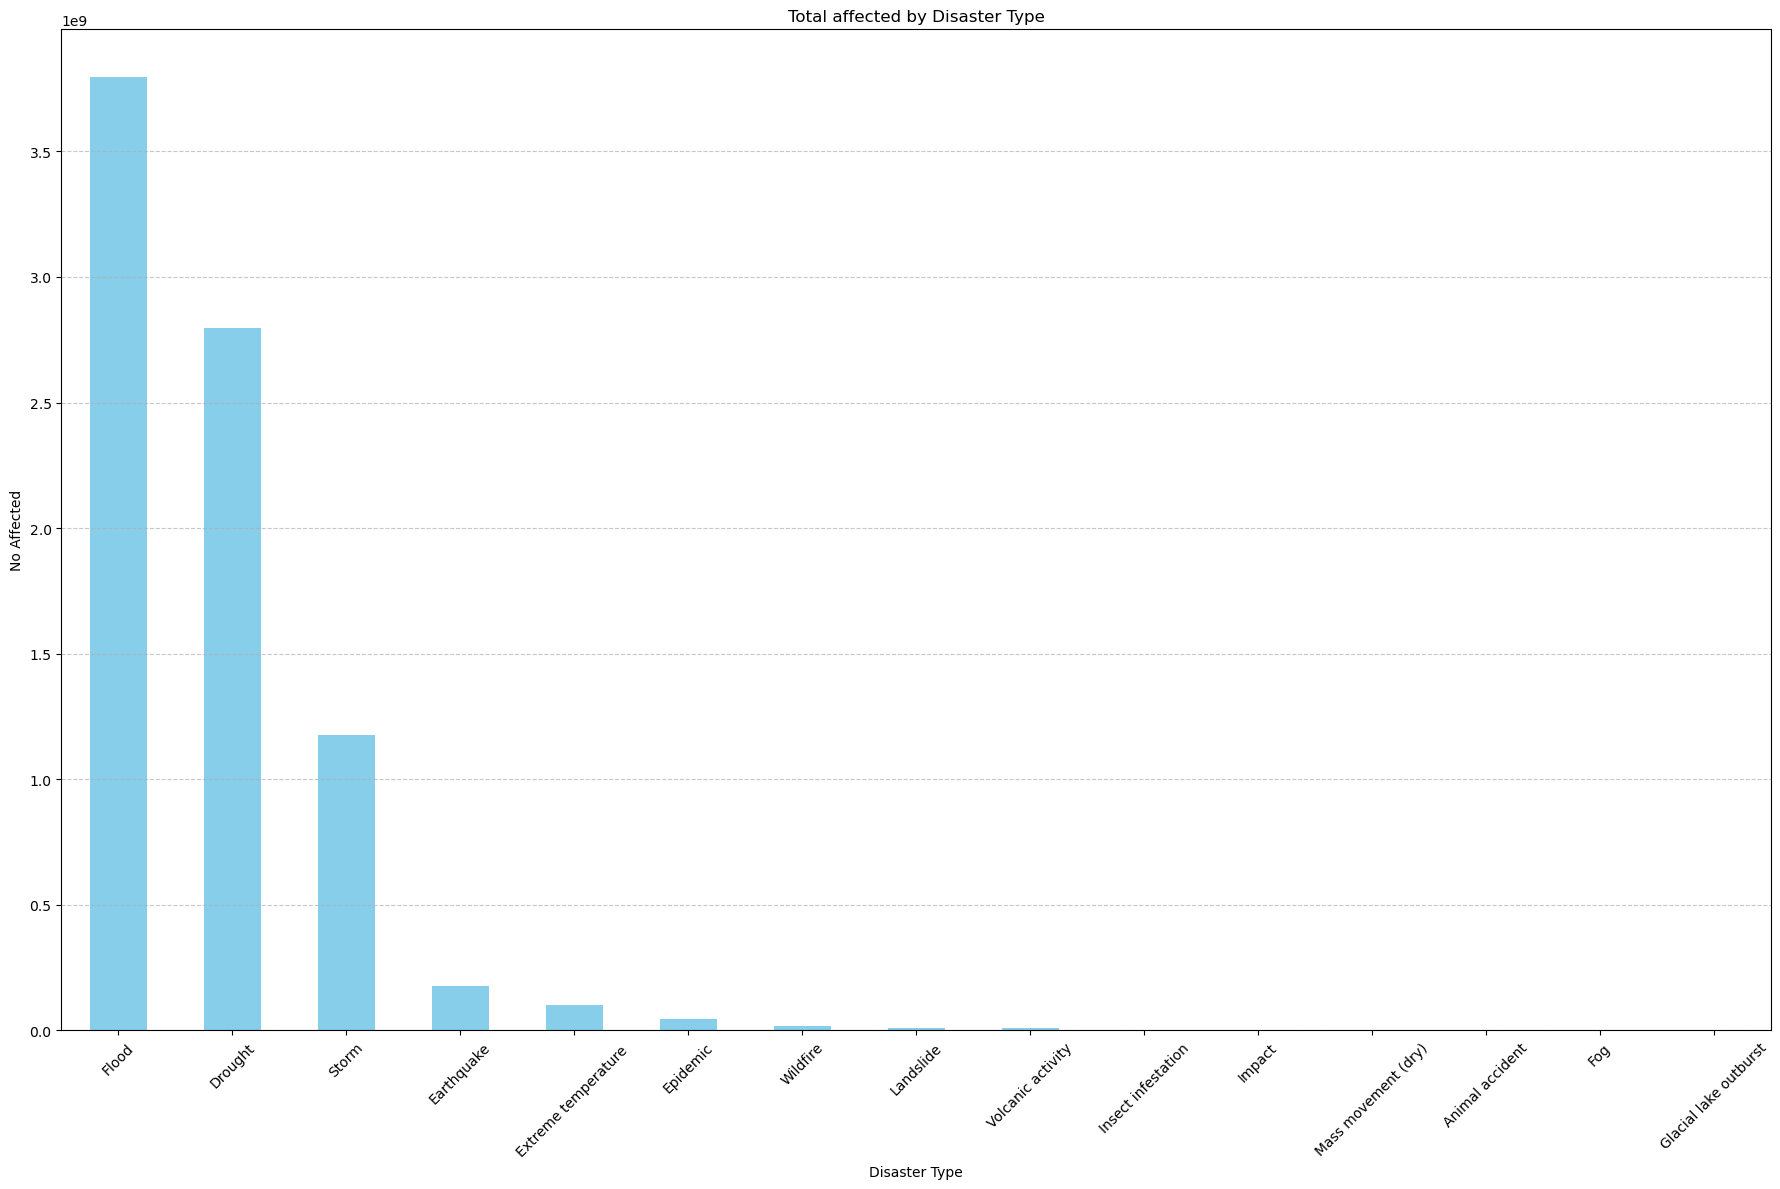

In [10]:
total_affected_by_type = df.groupby('Disaster Type')['No Affected'].sum()

print(total_affected_by_type)

total_affected_by_type_sorted = total_affected_by_type.sort_values(ascending=False)

plt.figure(figsize=(18, 12))
total_affected_by_type_sorted.plot(kind='bar', color='skyblue')
plt.title('Total affected by Disaster Type')
plt.xlabel('Disaster Type')
plt.ylabel('No Affected')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### As we can see drought,floods and storms are the most frequent type 

### Checking to see which countries face the most disasters and which countries face the least

In [12]:
country_disasters = df.groupby("Country").size().reset_index(name="Number of Disasters")
# number of disasters in descending order
country_disasters = country_disasters.sort_values(by="Number of Disasters", ascending=False)
most_disasters = country_disasters.head(5)
few_disasters = country_disasters[country_disasters["Number of Disasters"] >= 0].tail(5)
print("Countries with the most disasters:")
print(most_disasters)
print("\nCountries with very few disasters:")
print(few_disasters)


Countries with the most disasters:
                            Country  Number of Disasters
213  United States of America (the)                 1087
40                            China                  980
89                            India                  752
155               Philippines (the)                  668
90                        Indonesia                  572

Countries with very few disasters:
                                          Country  Number of Disasters
60                              Equatorial Guinea                    1
179                     Sint Maarten (Dutch part)                    1
94                                    Isle of Man                    1
165  Saint Helena, Ascension and Tristan da Cunha                    1
159                                         Qatar                    1


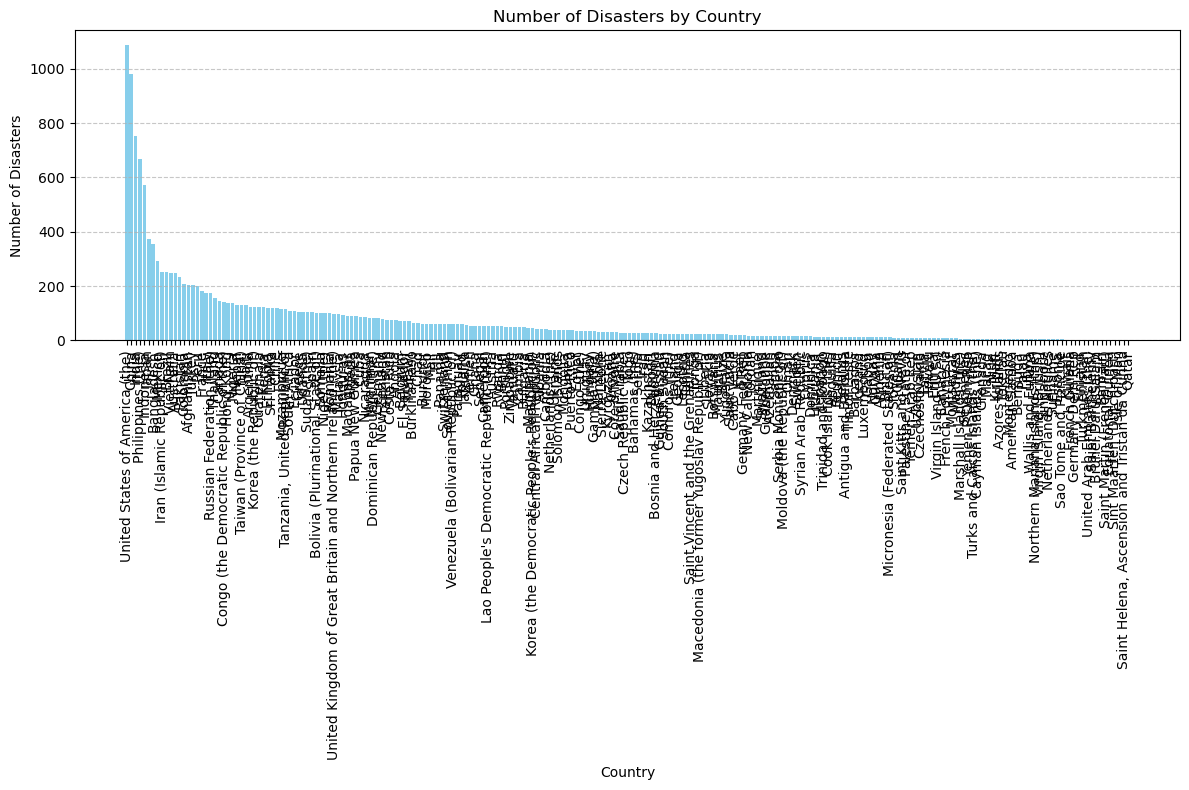

In [11]:
#visualing the data
country_disasters = df.groupby("Country").size().reset_index(name="Number of Disasters")
country_disasters = country_disasters.sort_values(by="Number of Disasters", ascending=False)
plt.figure(figsize=(12, 8))
plt.bar(country_disasters["Country"], country_disasters["Number of Disasters"], color='skyblue')
plt.title("Number of Disasters by Country")
plt.xlabel("Country")
plt.ylabel("Number of Disasters")
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


#### checking the correlation between Total Deaths due to disasters and the regular population

In [13]:
disasters_by_year = df.groupby('Year').sum()
population_by_year = df2.groupby('Year').sum()
merged_data = pd.merge(disasters_by_year, population_by_year, on='Year', suffixes=('_disasters', '_population'))
corr = merged_data['Total Deaths'].corr(merged_data['Population'], method='pearson')
print("Correlation coefficient:", corr)

Correlation coefficient: -0.16361870339029996


#### not much correlation but as we can see it does negatively affect the population

#### Defining population growth rate 

In [14]:
def population_growth_rate(df2, column):
    df2.loc[:, ['Population Growth Rate']] = ((df2[column].diff() / df2[column].shift(1)) * 100).fillna(0)
    df2.loc[population_growth['Year'] == 1950, 'Population Growth Rate'] = 0
    
    pivot_data = df2.pivot(index = 'Year', columns = 'Country name', values = 'Population Growth Rate')
    print(pivot_data.head())
    
    return df2

In [15]:
population_growth = df2[['Country name', 'Year', 'Population']]
population_growth = population_growth_rate(population_growth, 'Population')
population_growth.head()

Country name  Afghanistan  Africa (UN)   Albania   Algeria  American Samoa  \
Year                                                                         
1950             0.000000     0.000000  0.000000  0.000000        0.000000   
1951             1.217545     2.168647  2.920995  2.792447        2.046492   
1952             1.267800     2.194585  2.930712  2.695955        0.719905   
1953             1.265270     2.210306  2.998590  2.625402        0.551386   
1954             1.284556     2.226728  3.092306  2.454663        0.446814   

Country name   Andorra    Angola  Anguilla  Antigua and Barbuda  Argentina  \
Year                                                                         
1950          0.000000  0.000000  0.000000             0.000000   0.000000   
1951         -2.986065  2.044533  4.527403             2.125132   1.979498   
1952         -6.378249  2.061910  3.020517             2.063677   1.954765   
1953         -2.557078  2.031596  2.286557             2.021950

,Country name,Year,Population,Population Growth Rate
0,Afghanistan,1950,7480464,0.000000
1,Afghanistan,1951,7571542,1.217545
2,Afghanistan,1952,7667534,1.267800
3,Afghanistan,1953,7764549,1.265270
4,Afghanistan,1954,7864289,1.284556


In [16]:
population_growth.info()
print(population_growth.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18288 entries, 0 to 18287
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country name            18288 non-null  object 
 1   Year                    18288 non-null  int64  
 2   Population              18288 non-null  int64  
 3   Population Growth Rate  18288 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 571.6+ KB
Country name              0
Year                      0
Population                0
Population Growth Rate    0
dtype: int64


In [17]:
# adding it to the demographic dataset (df2)
df2['Population Growth Rate'] = df2.groupby('Country name')['Population'].pct_change() * 100

df2['Population Growth Rate'].fillna(0, inplace=True)


### Finding the average population growth rate of china and then comparing it to the growth rate of china during floods

Avg Population Growth Rate of China: 1.40%


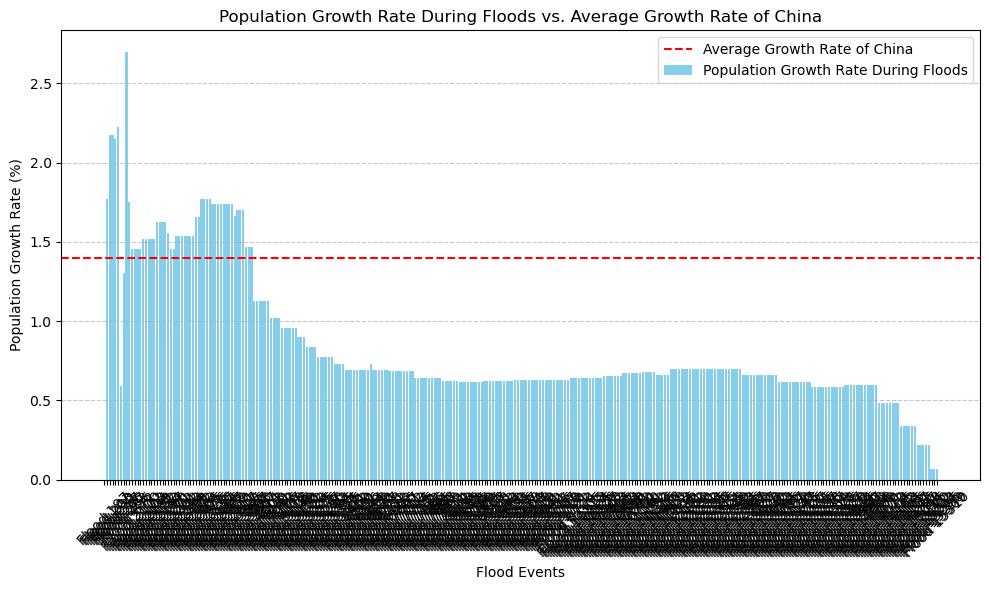

In [18]:
# average population growth rate of China
avg_growth_rate_china = df2[df2['Country name'] == 'China']['Population Growth Rate'].median()
print(f"Avg Population Growth Rate of China: {avg_growth_rate_china:.2f}%")

flood_events = []
growth_rates_during_flood = []

china_floods = df[(df['Country'] == 'China') & (df['Disaster Type'] == 'Flood')]
# Comparing population growth rate during floods with average growth rate of China
for index, row in china_floods.iterrows():
    start_year = row['Start Year']
    end_year = row['End Year']
    
    population_during_flood = df2[(df2['Country name'] == 'China') & (df2['Year'] >= start_year) & (df2['Year'] <= end_year)]
    
    if not population_during_flood.empty:
        # population growth rate during the flood event
        population_growth_rate_during_flood = population_during_flood['Population Growth Rate'].mean()
       
        flood_events.append(f"Flood {index+1}")
        growth_rates_during_flood.append(population_growth_rate_during_flood)

plt.figure(figsize=(10, 6))
plt.bar(flood_events, growth_rates_during_flood, color='skyblue', label='Population Growth Rate During Floods')
plt.axhline(y=avg_growth_rate_china, color='red', linestyle='--', label='Average Growth Rate of China')
plt.title('Population Growth Rate During Floods vs. Average Growth Rate of China')
plt.xlabel('Flood Events')
plt.ylabel('Population Growth Rate (%)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


#### Doing the same for indonesia

Avg Population Growth Rate of Indonesia: 1.92%


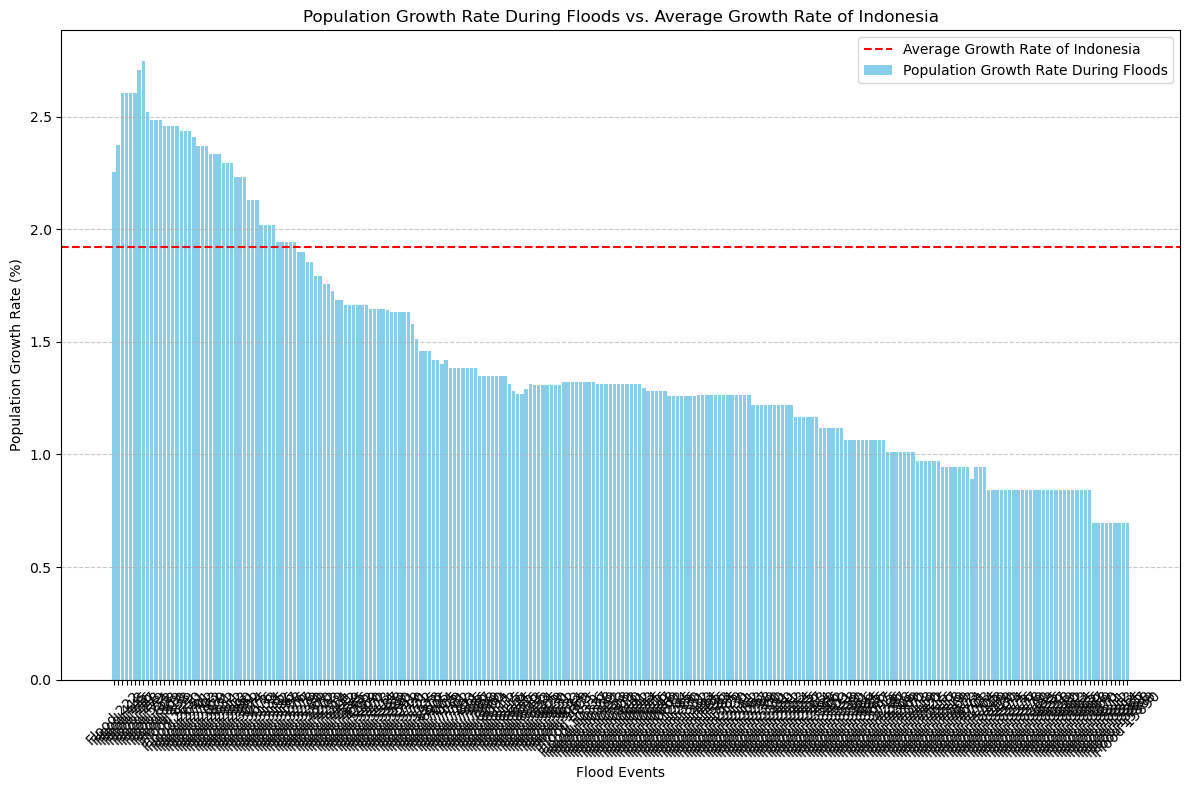

In [19]:
# the average population growth rate of Indonesia
avg_growth_rate_indonesia = df2[df2['Country name'] == 'Indonesia']['Population Growth Rate'].mean()
print(f"Avg Population Growth Rate of Indonesia: {avg_growth_rate_indonesia:.2f}%")

flood_events = []
growth_rates_during_flood = []

indonesia_floods = df[(df['Country'] == 'Indonesia') & (df['Disaster Type'] == 'Flood')]

# Comparing population growth rate during floods with average growth rate of Indonesia
for index, row in indonesia_floods.iterrows():
    start_year = row['Start Year']
    end_year = row['End Year']
    
    population_during_flood = df2[(df2['Country name'] == 'Indonesia') & (df2['Year'] >= start_year) & (df2['Year'] <= end_year)]
    
    if not population_during_flood.empty:
        # population growth rate during the flood event
        population_growth_rate_during_flood = population_during_flood['Population Growth Rate'].mean()
        
        flood_events.append(f"Flood {index+1}")
        growth_rates_during_flood.append(population_growth_rate_during_flood)

plt.figure(figsize=(12, 8))
plt.bar(flood_events, growth_rates_during_flood, color='skyblue', label='Population Growth Rate During Floods')
plt.axhline(y=avg_growth_rate_indonesia, color='red', linestyle='--', label='Average Growth Rate of Indonesia')
plt.title('Population Growth Rate During Floods vs. Average Growth Rate of Indonesia')
plt.xlabel('Flood Events')
plt.ylabel('Population Growth Rate (%)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### As we can see the population growth rate is significantly lower during times of flood events than the avg growth rate of China and Indonesia, this confirms the fact that natural disasters affect the population growth rate negatively

In [21]:
df2.to_csv('Demographic_Disaster.csv', index=False)